In [2]:
#In using this google colab, the Alphafold prediction output files for each gene pair will be placed in a zip file and downloaded to your
#google drive. After obtaining the zip file(s), please upload them to the following shared folder titled 'Alphafold Outputs': https://drive.google.com/drive/folders/1Gz7YlvsNBLRM48aVSyd6X7ODeR3TPklX?usp=drive_link


import pandas as pd
from google.colab import drive

drive.mount('/content/drive')

testgenes = pd.read_csv("top_interaction_sequences.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
testgenes

AF_inputs = []   #making a list where a list for each gene pair will be stored that contains the query sequence and the jobname.

for i, row in testgenes.iterrows():
  query_seq = row["gene1_seq"] + ":" + row["gene2_seq"]
  job_name = "locusIds_" + str(row["gene1_locusId"]) + "_" + str(row["gene2_locusId"])
  AF_inputs.append([query_seq, job_name])

In [4]:
testgenes

,Unnamed: 0,gene1,gene1_locusId,gene1_seq,gene2,gene2_locusId,gene2_seq,coefficient
0,9725021,Gene_2567,17245,MTVFNKFARTFKSHWLLYLCVIVFGITNLVASSGAHMVQRLLFFVL...,Gene_1225,15651,MKSTSDLFNEIIPLGRLIHMVNQKKDRLLNEYLSPLDITAAQFKVL...,5.033844
1,10544578,Gene_2783,17552,MNIYIGWLFKLIPLIMGLICIALGGFVLESSGQSEYFVAGHVLISL...,Gene_2574,17261,MENNEIQSVLMNALSLQEVHVSGDGSHFQVIAVGELFDGMSRVKKQ...,4.562073
2,10543821,Gene_2783,17552,MNIYIGWLFKLIPLIMGLICIALGGFVLESSGQSEYFVAGHVLISL...,Gene_1817,16347,MLSIFKPAPHKARLPAAEIDPTYRRLRWQIFLGIFFGYAAYYLVRK...,4.355901
3,12025962,Gene_3174,18059,MNTQYNSSYIFSITLVATLGGLLFGYDTAVISGTVESLNTVFVAPQ...,Gene_2850,17626,MQAYFDQLDRVRYEGSKSSNPLAFRHYNPDELVLGKRMEEHLRFAA...,4.136822
4,10545240,Gene_2783,17552,MNIYIGWLFKLIPLIMGLICIALGGFVLESSGQSEYFVAGHVLISL...,Gene_3237,18130,MHLSTHPTSYPTRYQEIAAKLEQELRQHYRCGDYLPAEQQLAARFE...,4.050859
5,12025961,Gene_3174,18059,MNTQYNSSYIFSITLVATLGGLLFGYDTAVISGTVESLNTVFVAPQ...,Gene_2849,17625,MYIGIDLGTSGVKVILLNEQGEVVAAQTEKLTVSRPHPLWSEQDPE...,3.873120
6,10542883,Gene_2783,17552,MNIYIGWLFKLIPLIMGLICIALGGFVLESSGQSEYFVAGHVLISL...,Gene_879,15217,MSKRRVVVTGLGMLSPVGNTVESTWKALLAGQSGISLIDHFDTSAY...,3.862169
7,10544985,Gene_2783,17552,MNIYIGWLFKLIPLIMGLICIALGGFVLESSGQSEYFVAGHVLISL...,Gene_2982,17788,MKVMRTTVATVVAATLSMSAFSVFAEASLTGAGATFPAPVYAKWAD...,3.846149
8,10542110,Gene_2783,17552,MNIYIGWLFKLIPLIMGLICIALGGFVLESSGQSEYFVAGHVLISL...,Gene_106,14288,MTVAYIAIGSNLASPLEQVNAALKALGDIPESHILTVSSFYRTPPL...,3.721365
9,10806226,Gene_2852,17628,MPYLLEMKNITKTFGSVKAIDNVCLRLNAGEIVSLCGENGSGKSTL...,Gene_2850,17626,MQAYFDQLDRVRYEGSKSSNPLAFRHYNPDELVLGKRMEEHLRFAA...,3.665344


In [5]:
AF_inputs[0]

['MTVFNKFARTFKSHWLLYLCVIVFGITNLVASSGAHMVQRLLFFVLTILVVKRISSLPLRLLVAAPFVLLTAADMSISLYSWCTFGTTFNDGFAISVLQSDPDEVVKMLGMYIPYLCAFAFLSLLFLAVIIKYDVSLPTKKVTGILLLIVISGSLFSACQFAYKDAKNKKAFSPYILASRFATYTPFFNLNYFALAAKEHQRLLSIANTVPYFQLSVRDTGIDTYVLIVGESVRVDNMSLYGYTRSTTPQVEAQRKQIKLFNQAISGAPYTALSVPLSLTADSVLSHDIHNYPDNIINMANQAGFQTFWLSSQSAFRQNGTAVTSIAMRAMETVYVRGFDELLLPHLSQALQQNTQQKKLIVLHLNGSHEPACSAYPQSSAVFQPQDDQDACYDNSIHYTDSLLGQVFELLKDRRASVMYFADHGLERDPTKKNVYFHGGREASQQAYHVPMFIWYSPVLGDGVDRTTENNIFSTAYNNYLINAWMGVTKPEQPQTLEEVIAHYKGDSRVVDANHDVFDYVMLRKEFTEDKQGNPTPEGQG:MKSTSDLFNEIIPLGRLIHMVNQKKDRLLNEYLSPLDITAAQFKVLCSIRCAACITPVELKKVLSVDLGALTRMLDRLVCKGWVERLPNPNDKRGVLVKLTTGGAAICEQCHQLVGQDLHQELTKNLTADEVATLEYLLKKVLP',
 'locusIds_17245_15651']

In [6]:
#-----------------------------------------------------------------------------------------------------------------------------------------------------
#Here is the Alphafold 2 code, only edits are turning the script into a function for query sequence and jobname and choosing certain inbuilt options such as
#num_relax = 1, etc. for the purposes of our predictions. I also deleted the part which displays images in the notebook after running the code.
#All of this code comes from ColabFold v1.5.5: AlphaFold2 using MMseqs2 (https://colab.research.google.com/github/sokrypton/ColabFold/blob/main/AlphaFold2.ipynb)

<img src="https://raw.githubusercontent.com/sokrypton/ColabFold/main/.github/ColabFold_Marv_Logo_Small.png" height="200" align="right" style="height:240px">

##ColabFold v1.5.5: AlphaFold2 using MMseqs2

Easy to use protein structure and complex prediction using [AlphaFold2](https://www.nature.com/articles/s41586-021-03819-2) and [Alphafold2-multimer](https://www.biorxiv.org/content/10.1101/2021.10.04.463034v1). Sequence alignments/templates are generated through [MMseqs2](mmseqs.com) and [HHsearch](https://github.com/soedinglab/hh-suite). For more details, see <a href="#Instructions">bottom</a> of the notebook, checkout the [ColabFold GitHub](https://github.com/sokrypton/ColabFold) and [Nature Protocols](https://www.nature.com/articles/s41596-024-01060-5).

Old versions: [v1.4](https://colab.research.google.com/github/sokrypton/ColabFold/blob/v1.4.0/AlphaFold2.ipynb), [v1.5.1](https://colab.research.google.com/github/sokrypton/ColabFold/blob/v1.5.1/AlphaFold2.ipynb), [v1.5.2](https://colab.research.google.com/github/sokrypton/ColabFold/blob/v1.5.2/AlphaFold2.ipynb), [v1.5.3-patch](https://colab.research.google.com/github/sokrypton/ColabFold/blob/56c72044c7d51a311ca99b953a71e552fdc042e1/AlphaFold2.ipynb)

[Mirdita M, Schütze K, Moriwaki Y, Heo L, Ovchinnikov S, Steinegger M. ColabFold: Making protein folding accessible to all.
*Nature Methods*, 2022](https://www.nature.com/articles/s41592-022-01488-1)

In [7]:
def runAF(query_sequence, jobname):
  #@title Input protein sequence(s), then hit `Runtime` -> `Run all`
  from google.colab import files
  import os
  import re
  import hashlib
  import random

  from sys import version_info
  python_version = f"{version_info.major}.{version_info.minor}"

  def add_hash(x,y):
    return x+"_"+hashlib.sha1(y.encode()).hexdigest()[:5]

  query_sequence = query_sequence #@param {type:"string"}
  #@markdown  - Use `:` to specify inter-protein chainbreaks for **modeling complexes** (supports homo- and hetro-oligomers). For example **PI...SK:PI...SK** for a homodimer
  jobname = jobname #@param {type:"string"}
  # number of models to use
  num_relax = 1 #@param [0, 1, 5] {type:"raw"}
  #@markdown - specify how many of the top ranked structures to relax using amber
  template_mode = "none" #@param ["none", "pdb100","custom"]
  #@markdown - `none` = no template information is used. `pdb100` = detect templates in pdb100 (see [notes](#pdb100)). `custom` - upload and search own templates (PDB or mmCIF format, see [notes](#custom_templates))

  use_amber = num_relax > 0

  # remove whitespaces
  query_sequence = "".join(query_sequence.split())

  basejobname = "".join(jobname.split())
  basejobname = re.sub(r'\W+', '', basejobname)
  jobname = add_hash(basejobname, query_sequence)

  # check if directory with jobname exists
  def check(folder):
    if os.path.exists(folder):
      return False
    else:
      return True
  if not check(jobname):
    n = 0
    while not check(f"{jobname}_{n}"): n += 1
    jobname = f"{jobname}_{n}"

  # make directory to save results
  os.makedirs(jobname, exist_ok=True)

  template_mode = "none"
  # save queries
  queries_path = os.path.join(jobname, f"{jobname}.csv")
  with open(queries_path, "w") as text_file:
    text_file.write(f"id,sequence\n{jobname},{query_sequence}")

  if template_mode == "pdb100":
    use_templates = True
    custom_template_path = None
  elif template_mode == "custom":
    custom_template_path = os.path.join(jobname,f"template")
    os.makedirs(custom_template_path, exist_ok=True)
    uploaded = files.upload()
    use_templates = True
    for fn in uploaded.keys():
      os.rename(fn,os.path.join(custom_template_path,fn))
  else:
    custom_template_path = None
    use_templates = False

  print("jobname",jobname)
  print("sequence",query_sequence)
  print("length",len(query_sequence.replace(":","")))
  #@title Install dependencies

  import os
  USE_AMBER = use_amber
  USE_TEMPLATES = use_templates
  PYTHON_VERSION = python_version

  if not os.path.isfile("COLABFOLD_READY"):
    print("installing colabfold...")
    os.system("pip install -q --no-warn-conflicts 'colabfold[alphafold-minus-jax] @ git+https://github.com/sokrypton/ColabFold'")
    if os.environ.get('TPU_NAME', False) != False:
      os.system("pip uninstall -y jax jaxlib")
      os.system("pip install --no-warn-conflicts --upgrade dm-haiku==0.0.10 'jax[cuda12_pip]'==0.3.25 -f https://storage.googleapis.com/jax-releases/jax_cuda_releases.html")
    os.system("ln -s /usr/local/lib/python3.*/dist-packages/colabfold colabfold")
    os.system("ln -s /usr/local/lib/python3.*/dist-packages/alphafold alphafold")
    os.system("touch COLABFOLD_READY")

  if USE_AMBER or USE_TEMPLATES:
    if not os.path.isfile("CONDA_READY"):
      print("installing conda...")
      os.system("wget -qnc https://github.com/conda-forge/miniforge/releases/latest/download/Miniforge3-Linux-x86_64.sh")
      os.system("bash Miniforge3-Linux-x86_64.sh -bfp /usr/local")
      os.system("mamba config --set auto_update_conda false")
      os.system("touch CONDA_READY")

  if USE_TEMPLATES and not os.path.isfile("HH_READY") and USE_AMBER and not os.path.isfile("AMBER_READY"):
    print("installing hhsuite and amber...")
    os.system(f"mamba install -y -c conda-forge -c bioconda kalign2=2.04 hhsuite=3.3.0 openmm=8.2.0 python='{PYTHON_VERSION}' pdbfixer")
    os.system("touch HH_READY")
    os.system("touch AMBER_READY")
  else:
    if USE_TEMPLATES and not os.path.isfile("HH_READY"):
      print("installing hhsuite...")
      os.system(f"mamba install -y -c conda-forge -c bioconda kalign2=2.04 hhsuite=3.3.0 python='{PYTHON_VERSION}'")
      os.system("touch HH_READY")
    if USE_AMBER and not os.path.isfile("AMBER_READY"):
      print("installing amber...")
      os.system(f"mamba install -y -c conda-forge openmm=8.2.0 python='{PYTHON_VERSION}' pdbfixer")
      os.system("touch AMBER_READY")
  #@markdown ### MSA options (custom MSA upload, single sequence, pairing mode)
  msa_mode = "mmseqs2_uniref_env" #@param ["mmseqs2_uniref_env", "mmseqs2_uniref","single_sequence","custom"]
  pair_mode = "unpaired_paired" #@param ["unpaired_paired","paired","unpaired"] {type:"string"}
  #@markdown - "unpaired_paired" = pair sequences from same species + unpaired MSA, "unpaired" = seperate MSA for each chain, "paired" - only use paired sequences.

  # decide which a3m to use
  if "mmseqs2" in msa_mode:
    a3m_file = os.path.join(jobname,f"{jobname}.a3m")

  elif msa_mode == "custom":
    a3m_file = os.path.join(jobname,f"{jobname}.custom.a3m")
    if not os.path.isfile(a3m_file):
      custom_msa_dict = files.upload()
      custom_msa = list(custom_msa_dict.keys())[0]
      header = 0
      import fileinput
      for line in fileinput.FileInput(custom_msa,inplace=1):
        if line.startswith(">"):
          header = header + 1
        if not line.rstrip():
          continue
        if line.startswith(">") == False and header == 1:
          query_sequence = line.rstrip()
        print(line, end='')

      os.rename(custom_msa, a3m_file)
      queries_path=a3m_file
      print(f"moving {custom_msa} to {a3m_file}")

  else:
    a3m_file = os.path.join(jobname,f"{jobname}.single_sequence.a3m")
    with open(a3m_file, "w") as text_file:
      text_file.write(">1\n%s" % query_sequence)
  #@markdown ### Advanced settings
  model_type = "auto" #@param ["auto", "alphafold2_ptm", "alphafold2_multimer_v1", "alphafold2_multimer_v2", "alphafold2_multimer_v3", "deepfold_v1", "alphafold2"]
  #@markdown - if `auto` selected, will use `alphafold2_ptm` for monomer prediction and `alphafold2_multimer_v3` for complex prediction.
  #@markdown Any of the mode_types can be used (regardless if input is monomer or complex).
  num_recycles = "3" #@param ["auto", "0", "1", "3", "6", "12", "24", "48"]
  #@markdown - if `auto` selected, will use `num_recycles=20` if `model_type=alphafold2_multimer_v3`, else `num_recycles=3` .
  recycle_early_stop_tolerance = "auto" #@param ["auto", "0.0", "0.5", "1.0"]
  #@markdown - if `auto` selected, will use `tol=0.5` if `model_type=alphafold2_multimer_v3` else `tol=0.0`.
  relax_max_iterations = 200 #@param [0, 200, 2000] {type:"raw"}
  #@markdown - max amber relax iterations, `0` = unlimited (AlphaFold2 default, can take very long)
  pairing_strategy = "greedy" #@param ["greedy", "complete"] {type:"string"}
  #@markdown - `greedy` = pair any taxonomically matching subsets, `complete` = all sequences have to match in one line.
  calc_extra_ptm = False #@param {type:"boolean"}
  #@markdown - return pairwise chain iptm/actifptm

  #@markdown #### Sample settings
  #@markdown -  enable dropouts and increase number of seeds to sample predictions from uncertainty of the model.
  #@markdown -  decrease `max_msa` to increase uncertainity
  max_msa = "auto" #@param ["auto", "512:1024", "256:512", "64:128", "32:64", "16:32"]
  num_seeds = 1 #@param [1,2,4,8,16] {type:"raw"}
  use_dropout = False #@param {type:"boolean"}

  num_recycles = None if num_recycles == "auto" else int(num_recycles)
  recycle_early_stop_tolerance = None if recycle_early_stop_tolerance == "auto" else float(recycle_early_stop_tolerance)
  if max_msa == "auto": max_msa = None

  #@markdown #### Save settings
  save_all = False #@param {type:"boolean"}
  save_recycles = False #@param {type:"boolean"}
  save_to_google_drive = True #@param {type:"boolean"}
  #@markdown -  if the save_to_google_drive option was selected, the result zip will be uploaded to your Google Drive
  dpi = 200 #@param {type:"integer"}
  #@markdown - set dpi for image resolution

  if save_to_google_drive:
    from pydrive2.drive import GoogleDrive
    from pydrive2.auth import GoogleAuth
    from google.colab import auth
    from oauth2client.client import GoogleCredentials
    auth.authenticate_user()
    gauth = GoogleAuth()
    gauth.credentials = GoogleCredentials.get_application_default()
    drive = GoogleDrive(gauth)
    print("You are logged into Google Drive and are good to go!")

  #@markdown Don't forget to hit `Runtime` -> `Run all` after updating the form.
  #@title Run Prediction
  display_images = True #@param {type:"boolean"}

  import sys
  import warnings
  warnings.simplefilter(action='ignore', category=FutureWarning)
  from Bio import BiopythonDeprecationWarning
  warnings.simplefilter(action='ignore', category=BiopythonDeprecationWarning)
  from pathlib import Path
  from colabfold.download import download_alphafold_params, default_data_dir
  from colabfold.utils import setup_logging
  from colabfold.batch import get_queries, run, set_model_type
  from colabfold.plot import plot_msa_v2

  import os
  import numpy as np
  try:
    K80_chk = os.popen('nvidia-smi | grep "Tesla K80" | wc -l').read()
  except:
    K80_chk = "0"
    pass
  if "1" in K80_chk:
    print("WARNING: found GPU Tesla K80: limited to total length < 1000")
    if "TF_FORCE_UNIFIED_MEMORY" in os.environ:
      del os.environ["TF_FORCE_UNIFIED_MEMORY"]
    if "XLA_PYTHON_CLIENT_MEM_FRACTION" in os.environ:
      del os.environ["XLA_PYTHON_CLIENT_MEM_FRACTION"]

  from colabfold.colabfold import plot_protein
  from pathlib import Path
  import matplotlib.pyplot as plt

  # For some reason we need that to get pdbfixer to import
  if use_amber and f"/usr/local/lib/python{python_version}/site-packages/" not in sys.path:
      sys.path.insert(0, f"/usr/local/lib/python{python_version}/site-packages/")

  def input_features_callback(input_features):
    if display_images:
      plot_msa_v2(input_features)
      plt.show()
      plt.close()

  def prediction_callback(protein_obj, length,
                          prediction_result, input_features, mode):
    model_name, relaxed = mode
    if not relaxed:
      if display_images:
        fig = plot_protein(protein_obj, Ls=length, dpi=150)
        plt.show()
        plt.close()

  result_dir = jobname
  log_filename = os.path.join(jobname,"log.txt")
  setup_logging(Path(log_filename))

  queries, is_complex = get_queries(queries_path)
  model_type = set_model_type(is_complex, model_type)

  if "multimer" in model_type and max_msa is not None:
    use_cluster_profile = False
  else:
    use_cluster_profile = True

  download_alphafold_params(model_type, Path("."))
  results = run(
      queries=queries,
      result_dir=result_dir,
      use_templates=use_templates,
      custom_template_path=custom_template_path,
      num_relax=num_relax,
      msa_mode=msa_mode,
      model_type=model_type,
      num_models=5,
      num_recycles=num_recycles,
      relax_max_iterations=relax_max_iterations,
      recycle_early_stop_tolerance=recycle_early_stop_tolerance,
      num_seeds=num_seeds,
      use_dropout=use_dropout,
      model_order=[1,2,3,4,5],
      is_complex=is_complex,
      data_dir=Path("."),
      keep_existing_results=False,
      rank_by="auto",
      pair_mode=pair_mode,
      pairing_strategy=pairing_strategy,
      stop_at_score=float(100),
      prediction_callback=prediction_callback,
      dpi=dpi,
      zip_results=False,
      save_all=save_all,
      max_msa=max_msa,
      use_cluster_profile=use_cluster_profile,
      input_features_callback=input_features_callback,
      save_recycles=save_recycles,
      user_agent="colabfold/google-colab-main",
      calc_extra_ptm=calc_extra_ptm,
  )
  results_zip = f"{jobname}.result.zip"
  os.system(f"zip -r {results_zip} {jobname}")
  #@title Package and download results
  #@markdown If you are having issues downloading the result archive, try disabling your adblocker and run this cell again. If that fails click on the little folder icon to the left, navigate to file: `jobname.result.zip`, right-click and select \"Download\" (see [screenshot](https://pbs.twimg.com/media/E6wRW2lWUAEOuoe?format=jpg&name=small)).

  if msa_mode == "custom":
    print("Don't forget to cite your custom MSA generation method.")

  files.download(f"{jobname}.result.zip")

  if save_to_google_drive == True and drive:
    uploaded = drive.CreateFile({'title': f"{jobname}.result.zip"})
    uploaded.SetContentFile(f"{jobname}.result.zip")
    uploaded.Upload()
    print(f"Uploaded {jobname}.result.zip to Google Drive with ID {uploaded.get('id')}")

jobname locusIds_18059_17626_32786
sequence MNTQYNSSYIFSITLVATLGGLLFGYDTAVISGTVESLNTVFVAPQNLSESAANSLLGFCVASALIGCIIGGALGGYCSNRFGRRDSLKIAAVLFFISGVGSAWPELGFTSINPDNTVPVYLAGYVPEFVIYRIIGGIGVGLASMLSPMYIAELAPAHIRGKLVSFNQFAIIFGQLLVYCVNYFIARSGDASWLNTDGWRYMFASECIPALLFLMLLYTVPESPRWLMSRGKQEQAEGILRKIMGNTLATQAVQEIKHSLDHGRKTGGRLLMFGVGVIVIGVMLSIFQQFVGINVVLYYAPEVFKTLGASTDIALLQTIIVGVINLTFTVLAIMTVDKFGRKPLQIIGALGMAIGMFSLGTAFYTQAPGIVALLSMLFYVAAFAMSWGPVCWVLLSEIFPNAIRGKALAIAVAAQWLANYFVSWTFPMMDKNSWLVAHFHNGFSYWIYGCMGVLAALFMWKFVPETKGKTLEELEALWEPETKKTQQTATL:MQAYFDQLDRVRYEGSKSSNPLAFRHYNPDELVLGKRMEEHLRFAACYWHTFCWNGADMFGVGAFNRPWQQPGEALALAKRKADVAFEFFHKLHVPFYCFHDVDVSPEGASLKEYINNFAQMVDVLAGKQEESGVKLLWGTANCFTNPRYGAGAATNPDPEVFSWAATQVVTAMEATHKLGGENYVLWGGREGYETLLNTDLRQEREQLGRFMQMVVEHKHKIGFQGTLLIEPKPQEPTKHQYDYDAATVYGFLKQFGLEKEIKLNIEANHATLAGHSFHHEIATAIALGLFGSVDANRGDAQLGWDTDQFPNSVEENALVMYEILKAGGFTTGGLNFDAKVRRQSTDKYDLFYGHIGAMDTMALALKIAARMIEDGELDKRIAQRYSGWNSELGQQILKGQMSLADLAKYAQEHHLSPVHQSGRQEQLENLVNHYLFDK
length 931
installing c

2025-06-02 11:02:55,414 Running on GPU
2025-06-02 11:02:55,763 Found 6 citations for tools or databases
2025-06-02 11:02:55,764 Query 1/1: locusIds_18059_17626_32786 (length 931)


PENDING:   0%|          | 0/300 [elapsed: 00:00 remaining: ?]

2025-06-02 11:02:56,618 Sleeping for 7s. Reason: PENDING


RUNNING:   2%|▏         | 7/300 [elapsed: 00:08 remaining: 05:56]

2025-06-02 11:03:04,292 Sleeping for 6s. Reason: RUNNING


RUNNING:   4%|▍         | 13/300 [elapsed: 00:15 remaining: 05:32]

2025-06-02 11:03:10,968 Sleeping for 5s. Reason: RUNNING


RUNNING:   6%|▌         | 18/300 [elapsed: 00:20 remaining: 05:24]

2025-06-02 11:03:16,654 Sleeping for 6s. Reason: RUNNING


RUNNING:   8%|▊         | 24/300 [elapsed: 00:27 remaining: 05:13]

2025-06-02 11:03:23,327 Sleeping for 8s. Reason: RUNNING


RUNNING:  11%|█         | 32/300 [elapsed: 00:36 remaining: 04:58]

2025-06-02 11:03:32,016 Sleeping for 8s. Reason: RUNNING


RUNNING:  13%|█▎        | 40/300 [elapsed: 00:44 remaining: 04:46]

2025-06-02 11:03:40,695 Sleeping for 5s. Reason: RUNNING


RUNNING:  15%|█▌        | 45/300 [elapsed: 00:50 remaining: 04:43]

2025-06-02 11:03:46,376 Sleeping for 7s. Reason: RUNNING


RUNNING:  17%|█▋        | 52/300 [elapsed: 00:58 remaining: 04:34]

2025-06-02 11:03:54,060 Sleeping for 6s. Reason: RUNNING


RUNNING:  19%|█▉        | 58/300 [elapsed: 01:04 remaining: 04:28]

2025-06-02 11:04:00,759 Sleeping for 9s. Reason: RUNNING


RUNNING:  22%|██▏       | 67/300 [elapsed: 01:14 remaining: 04:16]

2025-06-02 11:04:10,508 Sleeping for 9s. Reason: RUNNING


RUNNING:  25%|██▌       | 76/300 [elapsed: 01:24 remaining: 04:04]

2025-06-02 11:04:20,191 Sleeping for 5s. Reason: RUNNING


RUNNING:  27%|██▋       | 81/300 [elapsed: 01:30 remaining: 04:01]

2025-06-02 11:04:25,882 Sleeping for 9s. Reason: RUNNING


RUNNING:  30%|███       | 90/300 [elapsed: 01:39 remaining: 03:49]

2025-06-02 11:04:35,558 Sleeping for 10s. Reason: RUNNING


RUNNING:  33%|███▎      | 100/300 [elapsed: 01:50 remaining: 03:36]

2025-06-02 11:04:46,239 Sleeping for 10s. Reason: RUNNING


RUNNING:  37%|███▋      | 110/300 [elapsed: 02:01 remaining: 03:24]

2025-06-02 11:04:56,927 Sleeping for 8s. Reason: RUNNING


RUNNING:  39%|███▉      | 118/300 [elapsed: 02:09 remaining: 03:16]

2025-06-02 11:05:05,624 Sleeping for 6s. Reason: RUNNING


RUNNING:  41%|████▏     | 124/300 [elapsed: 02:16 remaining: 03:11]

2025-06-02 11:05:12,303 Sleeping for 8s. Reason: RUNNING


RUNNING:  44%|████▍     | 132/300 [elapsed: 02:25 remaining: 03:03]

2025-06-02 11:05:21,157 Sleeping for 9s. Reason: RUNNING


RUNNING:  47%|████▋     | 141/300 [elapsed: 02:35 remaining: 02:52]

2025-06-02 11:05:30,834 Sleeping for 9s. Reason: RUNNING


RUNNING:  50%|█████     | 150/300 [elapsed: 02:44 remaining: 02:42]

2025-06-02 11:05:40,516 Sleeping for 5s. Reason: RUNNING


RUNNING:  52%|█████▏    | 155/300 [elapsed: 02:50 remaining: 02:38]

2025-06-02 11:05:46,201 Sleeping for 10s. Reason: RUNNING


PENDING:   0%|          | 0/300 [elapsed: 00:00 remaining: ?]

2025-06-02 11:06:00,107 Sleeping for 9s. Reason: PENDING


RUNNING:   3%|▎         | 9/300 [elapsed: 00:10 remaining: 05:35]

2025-06-02 11:06:09,802 Sleeping for 9s. Reason: RUNNING


RUNNING:   6%|▌         | 18/300 [elapsed: 00:20 remaining: 05:12]

2025-06-02 11:06:19,476 Sleeping for 5s. Reason: RUNNING


RUNNING:   8%|▊         | 23/300 [elapsed: 00:25 remaining: 05:09]

2025-06-02 11:06:25,157 Sleeping for 6s. Reason: RUNNING


RUNNING:  10%|▉         | 29/300 [elapsed: 00:32 remaining: 05:03]

2025-06-02 11:06:31,919 Sleeping for 8s. Reason: RUNNING


RUNNING:  12%|█▏        | 37/300 [elapsed: 00:41 remaining: 04:50]

2025-06-02 11:06:40,594 Sleeping for 6s. Reason: RUNNING


RUNNING:  14%|█▍        | 43/300 [elapsed: 00:47 remaining: 04:44]

2025-06-02 11:06:47,280 Sleeping for 10s. Reason: RUNNING


RUNNING:  18%|█▊        | 53/300 [elapsed: 00:58 remaining: 04:29]

2025-06-02 11:06:57,962 Sleeping for 8s. Reason: RUNNING


RUNNING:  20%|██        | 61/300 [elapsed: 01:07 remaining: 04:20]

2025-06-02 11:07:06,657 Sleeping for 8s. Reason: RUNNING


RUNNING:  23%|██▎       | 69/300 [elapsed: 01:15 remaining: 04:11]

2025-06-02 11:07:15,346 Sleeping for 9s. Reason: RUNNING


RUNNING:  26%|██▌       | 78/300 [elapsed: 01:25 remaining: 04:00]

2025-06-02 11:07:25,023 Sleeping for 8s. Reason: RUNNING


RUNNING:  29%|██▊       | 86/300 [elapsed: 01:34 remaining: 03:52]

2025-06-02 11:07:33,702 Sleeping for 7s. Reason: RUNNING


RUNNING:  31%|███       | 93/300 [elapsed: 01:41 remaining: 03:45]

2025-06-02 11:07:41,390 Sleeping for 10s. Reason: RUNNING


RUNNING:  34%|███▍      | 103/300 [elapsed: 01:52 remaining: 03:32]

2025-06-02 11:07:52,071 Sleeping for 9s. Reason: RUNNING


RUNNING:  37%|███▋      | 112/300 [elapsed: 02:02 remaining: 03:22]

2025-06-02 11:08:01,759 Sleeping for 5s. Reason: RUNNING


RUNNING:  39%|███▉      | 117/300 [elapsed: 02:08 remaining: 03:19]

2025-06-02 11:08:07,443 Sleeping for 6s. Reason: RUNNING


RUNNING:  41%|████      | 123/300 [elapsed: 02:14 remaining: 03:14]

2025-06-02 11:08:14,122 Sleeping for 5s. Reason: RUNNING


RUNNING:  43%|████▎     | 128/300 [elapsed: 02:20 remaining: 03:10]

2025-06-02 11:08:19,806 Sleeping for 5s. Reason: RUNNING


RUNNING:  44%|████▍     | 133/300 [elapsed: 02:26 remaining: 03:05]

2025-06-02 11:08:25,486 Sleeping for 6s. Reason: RUNNING


RUNNING:  46%|████▋     | 139/300 [elapsed: 02:32 remaining: 02:59]

2025-06-02 11:08:32,171 Sleeping for 8s. Reason: RUNNING


RUNNING:  49%|████▉     | 147/300 [elapsed: 02:41 remaining: 02:48]

2025-06-02 11:08:40,869 Sleeping for 9s. Reason: RUNNING


RUNNING:  52%|█████▏    | 156/300 [elapsed: 02:51 remaining: 02:37]

2025-06-02 11:08:50,550 Sleeping for 5s. Reason: RUNNING


RUNNING:  54%|█████▎    | 161/300 [elapsed: 02:56 remaining: 02:33]

2025-06-02 11:08:56,232 Sleeping for 10s. Reason: RUNNING


COMPLETE: 100%|██████████| 300/300 [elapsed: 03:09 remaining: 00:00]


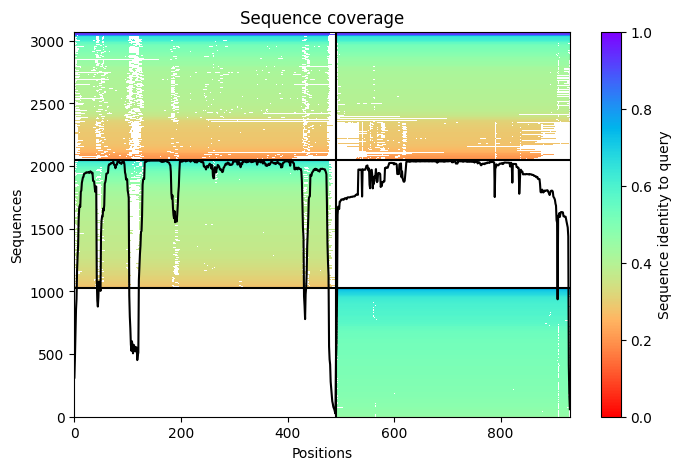

2025-06-02 11:09:14,879 Setting max_seq=508, max_extra_seq=2048
2025-06-02 11:13:30,769 alphafold2_multimer_v3_model_1_seed_000 recycle=0 pLDDT=86.5 pTM=0.517 ipTM=0.138
2025-06-02 11:16:43,755 alphafold2_multimer_v3_model_1_seed_000 recycle=1 pLDDT=87.1 pTM=0.508 ipTM=0.121 tol=12.8
2025-06-02 11:19:56,729 alphafold2_multimer_v3_model_1_seed_000 recycle=2 pLDDT=87.7 pTM=0.51 ipTM=0.126 tol=5
2025-06-02 11:23:09,345 alphafold2_multimer_v3_model_1_seed_000 recycle=3 pLDDT=87.6 pTM=0.512 ipTM=0.126 tol=2.89
2025-06-02 11:23:09,355 alphafold2_multimer_v3_model_1_seed_000 took 826.2s (3 recycles)


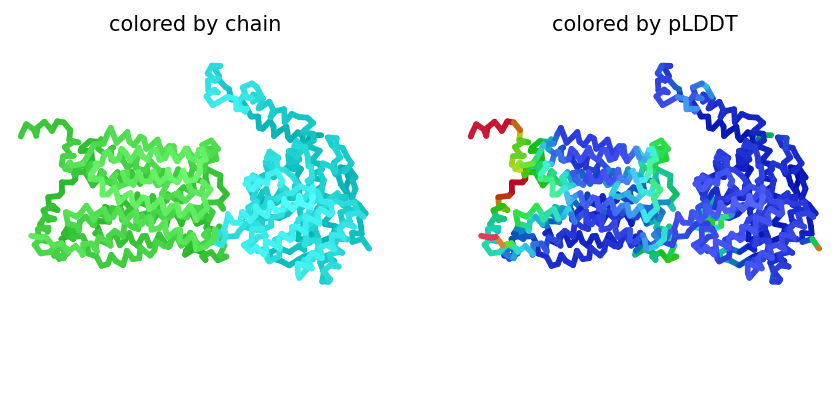

2025-06-02 11:26:22,804 alphafold2_multimer_v3_model_2_seed_000 recycle=0 pLDDT=87.8 pTM=0.514 ipTM=0.131
2025-06-02 11:29:35,222 alphafold2_multimer_v3_model_2_seed_000 recycle=1 pLDDT=87.9 pTM=0.508 ipTM=0.124 tol=9.77
2025-06-02 11:32:45,995 alphafold2_multimer_v3_model_2_seed_000 recycle=2 pLDDT=87.2 pTM=0.507 ipTM=0.119 tol=6.06
2025-06-02 11:35:56,036 alphafold2_multimer_v3_model_2_seed_000 recycle=3 pLDDT=88.4 pTM=0.507 ipTM=0.122 tol=4
2025-06-02 11:35:56,048 alphafold2_multimer_v3_model_2_seed_000 took 765.6s (3 recycles)


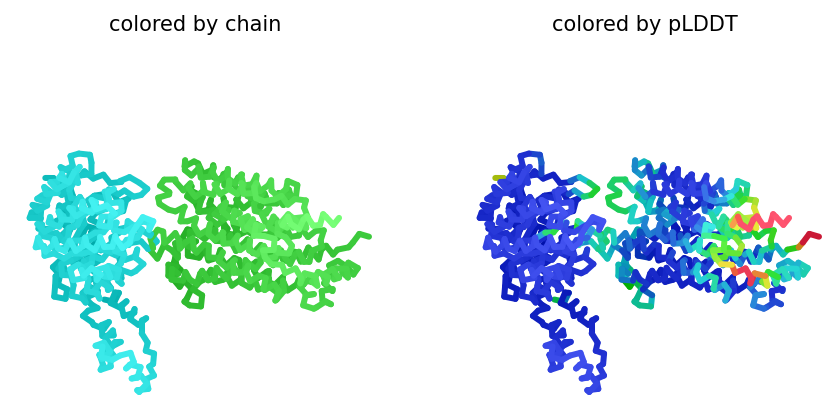

2025-06-02 11:39:06,636 alphafold2_multimer_v3_model_3_seed_000 recycle=0 pLDDT=87.6 pTM=0.515 ipTM=0.116
2025-06-02 11:42:16,355 alphafold2_multimer_v3_model_3_seed_000 recycle=1 pLDDT=87.9 pTM=0.52 ipTM=0.12 tol=22.7
2025-06-02 11:45:27,046 alphafold2_multimer_v3_model_3_seed_000 recycle=2 pLDDT=87.8 pTM=0.528 ipTM=0.131 tol=2.88
2025-06-02 11:48:37,810 alphafold2_multimer_v3_model_3_seed_000 recycle=3 pLDDT=87.9 pTM=0.528 ipTM=0.13 tol=0.812
2025-06-02 11:48:37,822 alphafold2_multimer_v3_model_3_seed_000 took 760.7s (3 recycles)


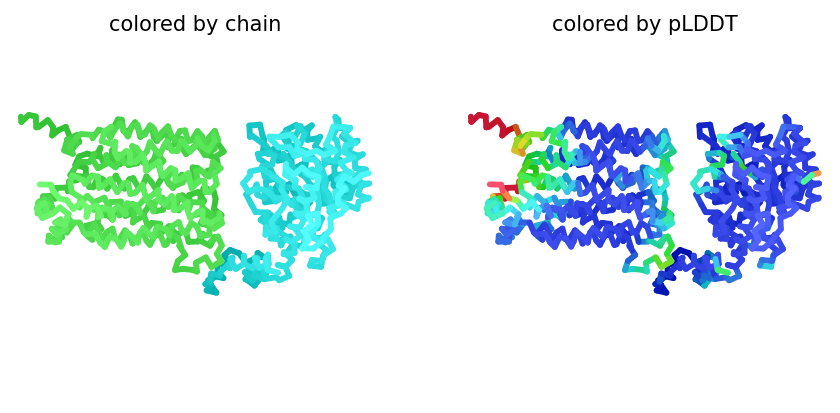

2025-06-02 11:51:47,722 alphafold2_multimer_v3_model_4_seed_000 recycle=0 pLDDT=88.1 pTM=0.524 ipTM=0.122
2025-06-02 11:54:58,457 alphafold2_multimer_v3_model_4_seed_000 recycle=1 pLDDT=88.6 pTM=0.537 ipTM=0.134 tol=6.86
2025-06-02 11:58:07,911 alphafold2_multimer_v3_model_4_seed_000 recycle=2 pLDDT=89.1 pTM=0.542 ipTM=0.135 tol=2.59
2025-06-02 12:01:17,650 alphafold2_multimer_v3_model_4_seed_000 recycle=3 pLDDT=89.1 pTM=0.542 ipTM=0.139 tol=0.94
2025-06-02 12:01:17,662 alphafold2_multimer_v3_model_4_seed_000 took 758.8s (3 recycles)


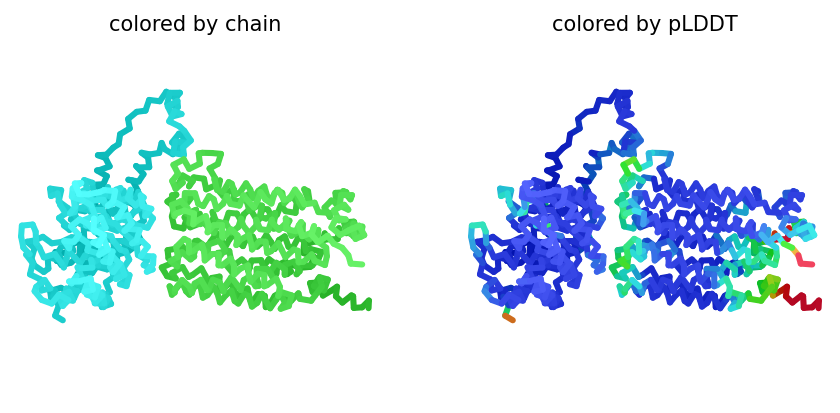

2025-06-02 12:04:27,727 alphafold2_multimer_v3_model_5_seed_000 recycle=0 pLDDT=86.5 pTM=0.526 ipTM=0.13
2025-06-02 12:07:38,469 alphafold2_multimer_v3_model_5_seed_000 recycle=1 pLDDT=87.7 pTM=0.531 ipTM=0.137 tol=3.65
2025-06-02 12:10:47,474 alphafold2_multimer_v3_model_5_seed_000 recycle=2 pLDDT=88.3 pTM=0.533 ipTM=0.13 tol=3.44
2025-06-02 12:13:58,646 alphafold2_multimer_v3_model_5_seed_000 recycle=3 pLDDT=88.5 pTM=0.534 ipTM=0.13 tol=0.957
2025-06-02 12:13:58,659 alphafold2_multimer_v3_model_5_seed_000 took 759.9s (3 recycles)


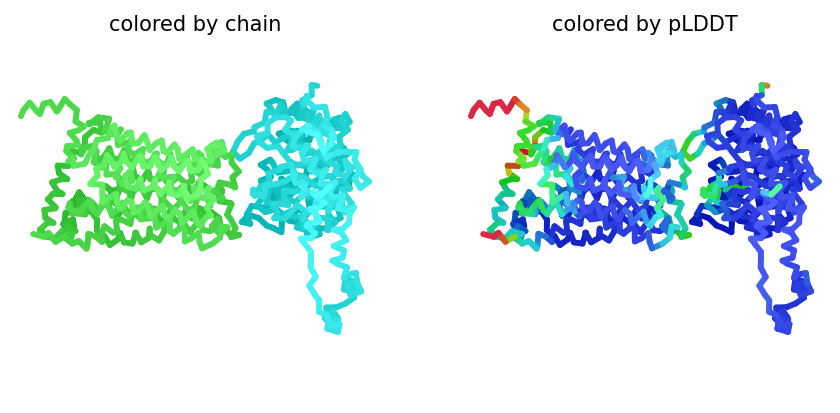

2025-06-02 12:13:59,717 reranking models by 'multimer' metric
2025-06-02 12:16:13,987 Relaxation took 134.3s
2025-06-02 12:16:13,987 rank_001_alphafold2_multimer_v3_model_4_seed_000 pLDDT=89.1 pTM=0.542 ipTM=0.139
2025-06-02 12:16:13,988 rank_002_alphafold2_multimer_v3_model_5_seed_000 pLDDT=88.5 pTM=0.534 ipTM=0.13
2025-06-02 12:16:13,988 rank_003_alphafold2_multimer_v3_model_3_seed_000 pLDDT=87.9 pTM=0.528 ipTM=0.13
2025-06-02 12:16:13,988 rank_004_alphafold2_multimer_v3_model_1_seed_000 pLDDT=87.6 pTM=0.512 ipTM=0.126
2025-06-02 12:16:13,988 rank_005_alphafold2_multimer_v3_model_2_seed_000 pLDDT=88.4 pTM=0.507 ipTM=0.122
2025-06-02 12:16:17,681 Done


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Uploaded locusIds_18059_17626_32786.result.zip to Google Drive with ID 1z2ewLpuWMN0TBjodzw8HErJOP2QIX8Uu
jobname locusIds_17552_18130_1fa4a
sequence MNIYIGWLFKLIPLIMGLICIALGGFVLESSGQSEYFVAGHVLISLAAICLALFTTAFIIISQLTRGVNTFYNTLFPIIGYAGSIITMIWGWALLAGNDVMADEFVAGHVIFGVGMIAACVSTVAASSGHFLLIPKNAAGSKSDGTPVQAYSSLIGNCLIAVPVLLTLLGFIWSITLLRSADITPHYVAGHVLLGLTAICACLIGLVATIVHQTRNTFSTKEHWLWCYWVIFLGSITVLQGIYVLVSSDASARLAPGIILICLGMICYSIFSKVWLLALVWRRTCSLANRIPMIPVFTCLFCLFLASFLAEMAQTDMGYFIPSRVLVGLGAVCFTLFSIVSILEAGSAKK:MHLSTHPTSYPTRYQEIAAKLEQELRQHYRCGDYLPAEQQLAARFEVNRHTLRRAIDQLVEKGWVQRRQGVGVLVLMRPFDYPLNAQARFSQNLLDQGSHPTSEKLLSVLRPASGHVADALGITEGENVIHLRTLRRVNGVALCLIDHYFADLTLWPTLQRFDSGSLHDFLREQTGIALRRSQTRISARRAQAKECQRLEIPNMSPLLCVRTLNHRDGESSPAEYSVSLTRADMIEFTMEH
length 591
You are logged into Google Drive and are good to go!
2025-06-02 12:16:29,248 Running on GPU
2025-06-02 12:16:29,251 Found 6 citations for tools or databases
2025-06-02 12:16:29,251 Query 1/1: locusIds_17552_18130_1fa4a (length 591)


PENDING:   0%|          | 0/300 [elapsed: 00:00 remaining: ?]

2025-06-02 12:16:29,952 Sleeping for 7s. Reason: PENDING


RUNNING:   2%|▏         | 7/300 [elapsed: 00:08 remaining: 05:50]

2025-06-02 12:16:37,633 Sleeping for 8s. Reason: RUNNING


RUNNING:   5%|▌         | 15/300 [elapsed: 00:17 remaining: 05:21]

2025-06-02 12:16:46,316 Sleeping for 6s. Reason: RUNNING


RUNNING:   7%|▋         | 21/300 [elapsed: 00:23 remaining: 05:13]

2025-06-02 12:16:52,998 Sleeping for 8s. Reason: RUNNING


RUNNING:  10%|▉         | 29/300 [elapsed: 00:32 remaining: 04:59]

2025-06-02 12:17:01,686 Sleeping for 5s. Reason: RUNNING


RUNNING:  11%|█▏        | 34/300 [elapsed: 00:38 remaining: 04:56]

2025-06-02 12:17:07,369 Sleeping for 7s. Reason: RUNNING


RUNNING:  14%|█▎        | 41/300 [elapsed: 00:45 remaining: 04:47]

2025-06-02 12:17:15,046 Sleeping for 7s. Reason: RUNNING


RUNNING:  16%|█▌        | 48/300 [elapsed: 00:53 remaining: 04:38]

2025-06-02 12:17:22,722 Sleeping for 5s. Reason: RUNNING


RUNNING:  18%|█▊        | 53/300 [elapsed: 00:59 remaining: 04:34]

2025-06-02 12:17:28,406 Sleeping for 7s. Reason: RUNNING


RUNNING:  20%|██        | 60/300 [elapsed: 01:06 remaining: 04:25]

2025-06-02 12:17:36,102 Sleeping for 5s. Reason: RUNNING


RUNNING:  22%|██▏       | 65/300 [elapsed: 01:12 remaining: 04:22]

2025-06-02 12:17:41,784 Sleeping for 7s. Reason: RUNNING


RUNNING:  24%|██▍       | 72/300 [elapsed: 01:20 remaining: 04:12]

2025-06-02 12:17:49,466 Sleeping for 7s. Reason: RUNNING


RUNNING:  26%|██▋       | 79/300 [elapsed: 01:27 remaining: 04:04]

2025-06-02 12:17:57,160 Sleeping for 8s. Reason: RUNNING


RUNNING:  29%|██▉       | 87/300 [elapsed: 01:36 remaining: 03:54]

2025-06-02 12:18:05,842 Sleeping for 5s. Reason: RUNNING


RUNNING:  31%|███       | 92/300 [elapsed: 01:42 remaining: 03:50]

2025-06-02 12:18:11,518 Sleeping for 10s. Reason: RUNNING


RUNNING:  34%|███▍      | 102/300 [elapsed: 01:52 remaining: 03:36]

2025-06-02 12:18:22,195 Sleeping for 5s. Reason: RUNNING


PENDING:   0%|          | 0/300 [elapsed: 00:00 remaining: ?]

2025-06-02 12:18:30,479 Sleeping for 8s. Reason: PENDING


RUNNING:   3%|▎         | 8/300 [elapsed: 00:09 remaining: 05:43]

2025-06-02 12:18:39,205 Sleeping for 10s. Reason: RUNNING


RUNNING:   6%|▌         | 18/300 [elapsed: 00:20 remaining: 05:12]

2025-06-02 12:18:49,898 Sleeping for 7s. Reason: RUNNING


RUNNING:   8%|▊         | 25/300 [elapsed: 00:27 remaining: 05:03]

2025-06-02 12:18:57,579 Sleeping for 8s. Reason: RUNNING


RUNNING:  11%|█         | 33/300 [elapsed: 00:36 remaining: 04:52]

2025-06-02 12:19:06,264 Sleeping for 10s. Reason: RUNNING


RUNNING:  14%|█▍        | 43/300 [elapsed: 00:47 remaining: 04:38]

2025-06-02 12:19:16,945 Sleeping for 8s. Reason: RUNNING


RUNNING:  17%|█▋        | 51/300 [elapsed: 00:55 remaining: 04:30]

2025-06-02 12:19:25,629 Sleeping for 7s. Reason: RUNNING


RUNNING:  19%|█▉        | 58/300 [elapsed: 01:03 remaining: 04:23]

2025-06-02 12:19:33,311 Sleeping for 5s. Reason: RUNNING


RUNNING:  21%|██        | 63/300 [elapsed: 01:09 remaining: 04:20]

2025-06-02 12:19:38,993 Sleeping for 9s. Reason: RUNNING


COMPLETE: 100%|██████████| 300/300 [elapsed: 01:19 remaining: 00:00]


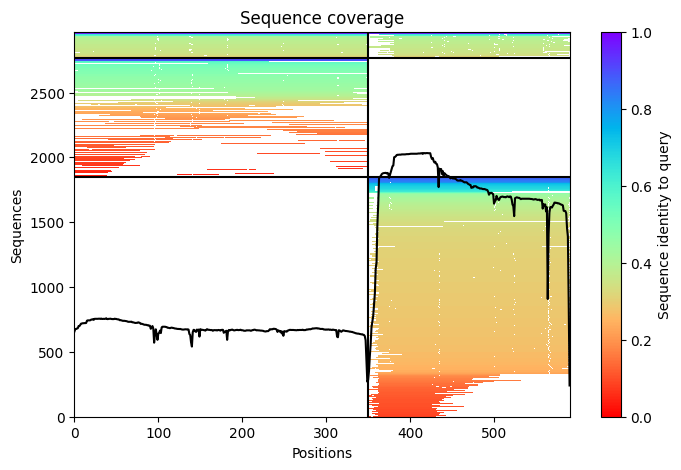

2025-06-02 12:19:51,221 Setting max_seq=508, max_extra_seq=2048
2025-06-02 12:22:01,993 alphafold2_multimer_v3_model_1_seed_000 recycle=0 pLDDT=74.8 pTM=0.588 ipTM=0.176
2025-06-02 12:23:15,807 alphafold2_multimer_v3_model_1_seed_000 recycle=1 pLDDT=77.6 pTM=0.615 ipTM=0.187 tol=2.15
2025-06-02 12:24:30,406 alphafold2_multimer_v3_model_1_seed_000 recycle=2 pLDDT=78.2 pTM=0.611 ipTM=0.171 tol=2.16
2025-06-02 12:25:46,562 alphafold2_multimer_v3_model_1_seed_000 recycle=3 pLDDT=78.4 pTM=0.612 ipTM=0.174 tol=0.833
2025-06-02 12:25:46,563 alphafold2_multimer_v3_model_1_seed_000 took 346.0s (3 recycles)


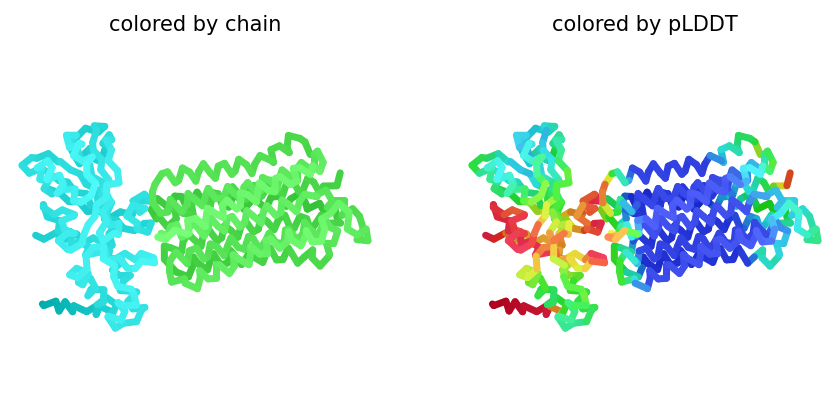

2025-06-02 12:27:02,997 alphafold2_multimer_v3_model_2_seed_000 recycle=0 pLDDT=79.6 pTM=0.612 ipTM=0.179
2025-06-02 12:28:18,991 alphafold2_multimer_v3_model_2_seed_000 recycle=1 pLDDT=81.2 pTM=0.631 ipTM=0.222 tol=4.1
2025-06-02 12:29:34,805 alphafold2_multimer_v3_model_2_seed_000 recycle=2 pLDDT=80.7 pTM=0.612 ipTM=0.177 tol=2.71
2025-06-02 12:30:50,774 alphafold2_multimer_v3_model_2_seed_000 recycle=3 pLDDT=80.6 pTM=0.615 ipTM=0.186 tol=2.82
2025-06-02 12:30:50,775 alphafold2_multimer_v3_model_2_seed_000 took 303.7s (3 recycles)


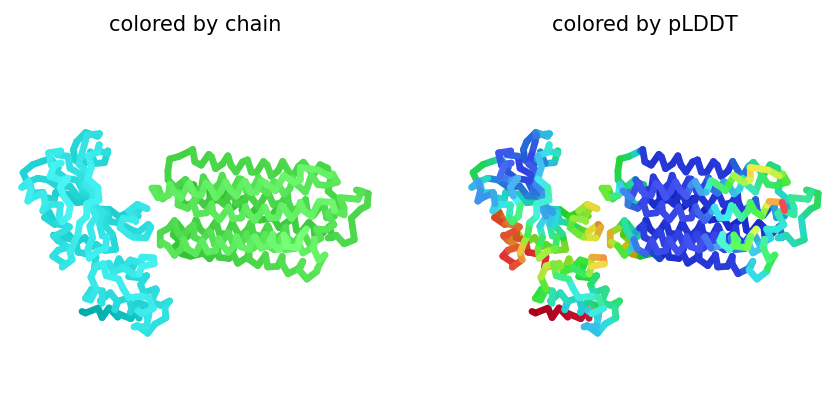

2025-06-02 12:32:07,398 alphafold2_multimer_v3_model_3_seed_000 recycle=0 pLDDT=81.5 pTM=0.623 ipTM=0.19
2025-06-02 12:33:23,343 alphafold2_multimer_v3_model_3_seed_000 recycle=1 pLDDT=81.6 pTM=0.62 ipTM=0.184 tol=1.64
2025-06-02 12:34:39,271 alphafold2_multimer_v3_model_3_seed_000 recycle=2 pLDDT=81.3 pTM=0.62 ipTM=0.185 tol=0.944
2025-06-02 12:35:55,437 alphafold2_multimer_v3_model_3_seed_000 recycle=3 pLDDT=81.3 pTM=0.621 ipTM=0.193 tol=2.04
2025-06-02 12:35:55,438 alphafold2_multimer_v3_model_3_seed_000 took 304.2s (3 recycles)


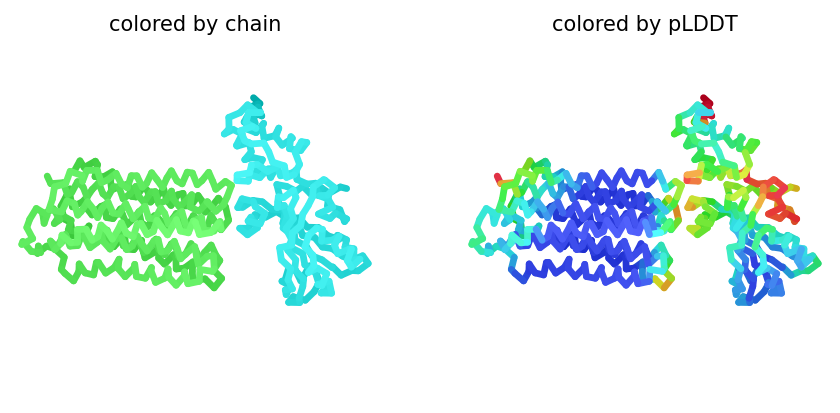

2025-06-02 12:37:12,169 alphafold2_multimer_v3_model_4_seed_000 recycle=0 pLDDT=76.4 pTM=0.624 ipTM=0.21
2025-06-02 12:38:28,109 alphafold2_multimer_v3_model_4_seed_000 recycle=1 pLDDT=76.5 pTM=0.622 ipTM=0.202 tol=2.45
2025-06-02 12:39:44,246 alphafold2_multimer_v3_model_4_seed_000 recycle=2 pLDDT=76.9 pTM=0.619 ipTM=0.197 tol=0.766
2025-06-02 12:41:00,124 alphafold2_multimer_v3_model_4_seed_000 recycle=3 pLDDT=77.8 pTM=0.619 ipTM=0.193 tol=1.51
2025-06-02 12:41:00,125 alphafold2_multimer_v3_model_4_seed_000 took 303.9s (3 recycles)


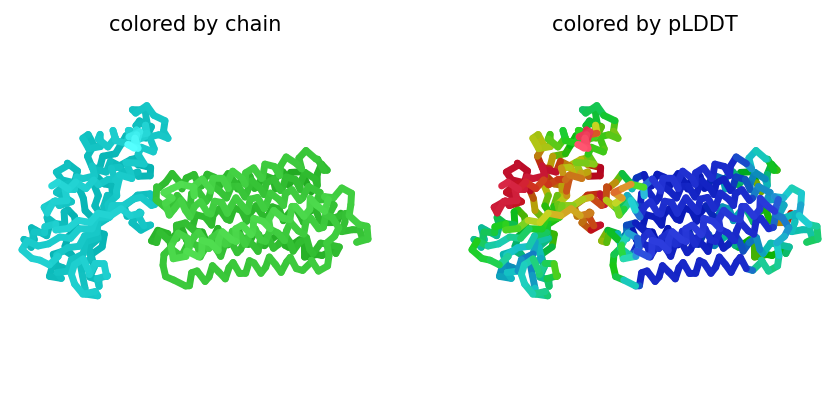

2025-06-02 12:42:16,612 alphafold2_multimer_v3_model_5_seed_000 recycle=0 pLDDT=78.9 pTM=0.622 ipTM=0.202
2025-06-02 12:43:32,477 alphafold2_multimer_v3_model_5_seed_000 recycle=1 pLDDT=79.8 pTM=0.622 ipTM=0.193 tol=1.19
2025-06-02 12:44:48,785 alphafold2_multimer_v3_model_5_seed_000 recycle=2 pLDDT=80 pTM=0.623 ipTM=0.186 tol=3.43
2025-06-02 12:46:04,741 alphafold2_multimer_v3_model_5_seed_000 recycle=3 pLDDT=80.7 pTM=0.621 ipTM=0.18 tol=1.46
2025-06-02 12:46:04,742 alphafold2_multimer_v3_model_5_seed_000 took 304.1s (3 recycles)


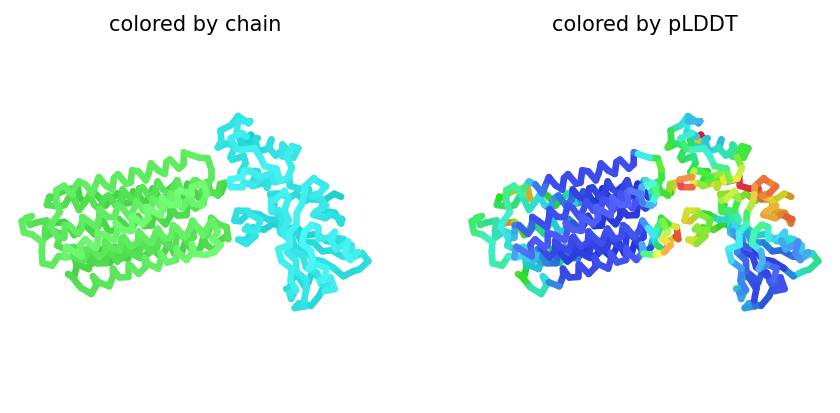

2025-06-02 12:46:05,258 reranking models by 'multimer' metric
2025-06-02 12:48:06,433 Relaxation took 121.2s
2025-06-02 12:48:06,434 rank_001_alphafold2_multimer_v3_model_4_seed_000 pLDDT=77.8 pTM=0.619 ipTM=0.193
2025-06-02 12:48:06,434 rank_002_alphafold2_multimer_v3_model_3_seed_000 pLDDT=81.3 pTM=0.621 ipTM=0.193
2025-06-02 12:48:06,434 rank_003_alphafold2_multimer_v3_model_2_seed_000 pLDDT=80.6 pTM=0.615 ipTM=0.186
2025-06-02 12:48:06,434 rank_004_alphafold2_multimer_v3_model_5_seed_000 pLDDT=80.7 pTM=0.621 ipTM=0.18
2025-06-02 12:48:06,434 rank_005_alphafold2_multimer_v3_model_1_seed_000 pLDDT=78.4 pTM=0.612 ipTM=0.174
2025-06-02 12:48:08,115 Done


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Uploaded locusIds_17552_18130_1fa4a.result.zip to Google Drive with ID 1MlKoireoe0LSE3Vnhxwd6OdoO7tn-9FF
jobname locusIds_18059_17625_d3dcb
sequence MNTQYNSSYIFSITLVATLGGLLFGYDTAVISGTVESLNTVFVAPQNLSESAANSLLGFCVASALIGCIIGGALGGYCSNRFGRRDSLKIAAVLFFISGVGSAWPELGFTSINPDNTVPVYLAGYVPEFVIYRIIGGIGVGLASMLSPMYIAELAPAHIRGKLVSFNQFAIIFGQLLVYCVNYFIARSGDASWLNTDGWRYMFASECIPALLFLMLLYTVPESPRWLMSRGKQEQAEGILRKIMGNTLATQAVQEIKHSLDHGRKTGGRLLMFGVGVIVIGVMLSIFQQFVGINVVLYYAPEVFKTLGASTDIALLQTIIVGVINLTFTVLAIMTVDKFGRKPLQIIGALGMAIGMFSLGTAFYTQAPGIVALLSMLFYVAAFAMSWGPVCWVLLSEIFPNAIRGKALAIAVAAQWLANYFVSWTFPMMDKNSWLVAHFHNGFSYWIYGCMGVLAALFMWKFVPETKGKTLEELEALWEPETKKTQQTATL:MYIGIDLGTSGVKVILLNEQGEVVAAQTEKLTVSRPHPLWSEQDPEQWWQATDRAMKALGDQHSLQDVKALGIAGQMHGATLLDAQQRVLRPAILWNDGRCAQECTLLEARVPQSRVITGNLMMPGFTAPKLLWVQRHEPEIFRQIDKVLLPKDYLRLRMTGEFASDMSDAAGTMWLDVAKRDWSDVMLQACDLSRDQMPALYEGSEITGALLPEVAKAWGMATVPVVAGGGDNAAGAVGVGMVDANQAMLSLGTSGVYFAVSEGFLSKPESAVHSFCHALPQRWHLMSVMLSAASCLDWAAKLTGLSNVPALIAAAQQADESAEPVWFLPYLSGERTPHNNPQAKGVFFGLTHQHGPN

PENDING:   0%|          | 0/300 [elapsed: 00:00 remaining: ?]

2025-06-02 12:48:15,764 Sleeping for 9s. Reason: PENDING


RUNNING:   3%|▎         | 9/300 [elapsed: 00:10 remaining: 05:38]

2025-06-02 12:48:25,470 Sleeping for 9s. Reason: RUNNING


RUNNING:   6%|▌         | 18/300 [elapsed: 00:20 remaining: 05:13]

2025-06-02 12:48:35,146 Sleeping for 8s. Reason: RUNNING


RUNNING:   9%|▊         | 26/300 [elapsed: 00:28 remaining: 05:01]

2025-06-02 12:48:43,845 Sleeping for 7s. Reason: RUNNING


RUNNING:  11%|█         | 33/300 [elapsed: 00:36 remaining: 04:53]

2025-06-02 12:48:51,527 Sleeping for 7s. Reason: RUNNING


RUNNING:  13%|█▎        | 40/300 [elapsed: 00:44 remaining: 04:45]

2025-06-02 12:48:59,214 Sleeping for 5s. Reason: RUNNING


RUNNING:  15%|█▌        | 45/300 [elapsed: 00:49 remaining: 04:42]

2025-06-02 12:49:04,898 Sleeping for 9s. Reason: RUNNING


RUNNING:  18%|█▊        | 54/300 [elapsed: 00:59 remaining: 04:29]

2025-06-02 12:49:14,583 Sleeping for 9s. Reason: RUNNING


RUNNING:  21%|██        | 63/300 [elapsed: 01:09 remaining: 04:18]

2025-06-02 12:49:24,269 Sleeping for 8s. Reason: RUNNING


RUNNING:  24%|██▎       | 71/300 [elapsed: 01:17 remaining: 04:09]

2025-06-02 12:49:32,948 Sleeping for 5s. Reason: RUNNING


RUNNING:  25%|██▌       | 76/300 [elapsed: 01:23 remaining: 04:06]

2025-06-02 12:49:38,637 Sleeping for 5s. Reason: RUNNING


RUNNING:  27%|██▋       | 81/300 [elapsed: 01:29 remaining: 04:03]

2025-06-02 12:49:44,372 Sleeping for 9s. Reason: RUNNING


RUNNING:  30%|███       | 90/300 [elapsed: 01:39 remaining: 03:50]

2025-06-02 12:49:54,059 Sleeping for 9s. Reason: RUNNING


RUNNING:  33%|███▎      | 99/300 [elapsed: 01:48 remaining: 03:39]

2025-06-02 12:50:03,743 Sleeping for 7s. Reason: RUNNING


RUNNING:  35%|███▌      | 106/300 [elapsed: 01:56 remaining: 03:31]

2025-06-02 12:50:11,423 Sleeping for 6s. Reason: RUNNING


RUNNING:  37%|███▋      | 112/300 [elapsed: 02:03 remaining: 03:26]

2025-06-02 12:50:18,098 Sleeping for 7s. Reason: RUNNING


RUNNING:  40%|███▉      | 119/300 [elapsed: 02:10 remaining: 03:19]

2025-06-02 12:50:25,954 Sleeping for 8s. Reason: RUNNING


RUNNING:  42%|████▏     | 127/300 [elapsed: 02:19 remaining: 03:10]

2025-06-02 12:50:34,655 Sleeping for 7s. Reason: RUNNING


RUNNING:  45%|████▍     | 134/300 [elapsed: 02:27 remaining: 03:02]

2025-06-02 12:50:42,344 Sleeping for 7s. Reason: RUNNING


RUNNING:  47%|████▋     | 141/300 [elapsed: 02:35 remaining: 02:54]

2025-06-02 12:50:50,031 Sleeping for 8s. Reason: RUNNING


RUNNING:  50%|████▉     | 149/300 [elapsed: 02:43 remaining: 02:45]

2025-06-02 12:50:58,715 Sleeping for 6s. Reason: RUNNING


RUNNING:  52%|█████▏    | 155/300 [elapsed: 02:50 remaining: 02:40]

2025-06-02 12:51:05,557 Sleeping for 8s. Reason: RUNNING


RUNNING:  54%|█████▍    | 163/300 [elapsed: 02:59 remaining: 02:30]

2025-06-02 12:51:14,244 Sleeping for 8s. Reason: RUNNING


RUNNING:  57%|█████▋    | 171/300 [elapsed: 03:07 remaining: 02:21]

2025-06-02 12:51:22,945 Sleeping for 7s. Reason: RUNNING


RUNNING:  59%|█████▉    | 178/300 [elapsed: 03:15 remaining: 02:13]

2025-06-02 12:51:30,644 Sleeping for 10s. Reason: RUNNING


RUNNING:  63%|██████▎   | 188/300 [elapsed: 03:26 remaining: 02:01]

2025-06-02 12:51:41,329 Sleeping for 7s. Reason: RUNNING


RUNNING:  65%|██████▌   | 195/300 [elapsed: 03:34 remaining: 01:54]

2025-06-02 12:51:49,019 Sleeping for 5s. Reason: RUNNING


RUNNING:  67%|██████▋   | 200/300 [elapsed: 03:39 remaining: 01:49]

2025-06-02 12:51:54,704 Sleeping for 7s. Reason: RUNNING


RUNNING:  69%|██████▉   | 207/300 [elapsed: 03:47 remaining: 01:42]

2025-06-02 12:52:02,388 Sleeping for 8s. Reason: RUNNING


RUNNING:  72%|███████▏  | 215/300 [elapsed: 03:56 remaining: 01:33]

2025-06-02 12:52:11,079 Sleeping for 7s. Reason: RUNNING


RUNNING:  74%|███████▍  | 222/300 [elapsed: 04:03 remaining: 01:25]

2025-06-02 12:52:18,770 Sleeping for 10s. Reason: RUNNING


RUNNING:  77%|███████▋  | 232/300 [elapsed: 04:14 remaining: 01:13]

2025-06-02 12:52:29,445 Sleeping for 7s. Reason: RUNNING


PENDING:   0%|          | 0/300 [elapsed: 00:00 remaining: ?]

2025-06-02 12:52:40,432 Sleeping for 5s. Reason: PENDING


RUNNING:   2%|▏         | 5/300 [elapsed: 00:06 remaining: 06:16]

2025-06-02 12:52:46,115 Sleeping for 10s. Reason: RUNNING


RUNNING:   5%|▌         | 15/300 [elapsed: 00:17 remaining: 05:19]

2025-06-02 12:52:56,796 Sleeping for 10s. Reason: RUNNING


RUNNING:   8%|▊         | 25/300 [elapsed: 00:27 remaining: 05:01]

2025-06-02 12:53:07,510 Sleeping for 8s. Reason: RUNNING


RUNNING:  11%|█         | 33/300 [elapsed: 00:36 remaining: 04:51]

2025-06-02 12:53:16,202 Sleeping for 7s. Reason: RUNNING


RUNNING:  13%|█▎        | 40/300 [elapsed: 00:44 remaining: 04:44]

2025-06-02 12:53:23,882 Sleeping for 10s. Reason: RUNNING


RUNNING:  17%|█▋        | 50/300 [elapsed: 00:54 remaining: 04:31]

2025-06-02 12:53:34,573 Sleeping for 8s. Reason: RUNNING


RUNNING:  19%|█▉        | 58/300 [elapsed: 01:03 remaining: 04:22]

2025-06-02 12:53:43,272 Sleeping for 10s. Reason: RUNNING


RUNNING:  23%|██▎       | 68/300 [elapsed: 01:14 remaining: 04:10]

2025-06-02 12:53:53,963 Sleeping for 9s. Reason: RUNNING


RUNNING:  26%|██▌       | 77/300 [elapsed: 01:23 remaining: 04:00]

2025-06-02 12:54:03,667 Sleeping for 9s. Reason: RUNNING


RUNNING:  29%|██▊       | 86/300 [elapsed: 01:33 remaining: 03:50]

2025-06-02 12:54:13,349 Sleeping for 6s. Reason: RUNNING


RUNNING:  31%|███       | 92/300 [elapsed: 01:40 remaining: 03:46]

2025-06-02 12:54:20,042 Sleeping for 5s. Reason: RUNNING


RUNNING:  32%|███▏      | 97/300 [elapsed: 01:45 remaining: 03:42]

2025-06-02 12:54:25,728 Sleeping for 10s. Reason: RUNNING


RUNNING:  36%|███▌      | 107/300 [elapsed: 01:56 remaining: 03:29]

2025-06-02 12:54:36,416 Sleeping for 6s. Reason: RUNNING


RUNNING:  38%|███▊      | 113/300 [elapsed: 02:03 remaining: 03:24]

2025-06-02 12:54:43,101 Sleeping for 7s. Reason: RUNNING


RUNNING:  40%|████      | 120/300 [elapsed: 02:11 remaining: 03:16]

2025-06-02 12:54:50,779 Sleeping for 6s. Reason: RUNNING


RUNNING:  42%|████▏     | 126/300 [elapsed: 02:17 remaining: 03:11]

2025-06-02 12:54:57,465 Sleeping for 7s. Reason: RUNNING


RUNNING:  44%|████▍     | 133/300 [elapsed: 02:25 remaining: 03:03]

2025-06-02 12:55:05,147 Sleeping for 7s. Reason: RUNNING


RUNNING:  47%|████▋     | 140/300 [elapsed: 02:33 remaining: 02:55]

2025-06-02 12:55:12,829 Sleeping for 6s. Reason: RUNNING


RUNNING:  49%|████▊     | 146/300 [elapsed: 02:39 remaining: 02:49]

2025-06-02 12:55:19,517 Sleeping for 8s. Reason: RUNNING


RUNNING:  51%|█████▏    | 154/300 [elapsed: 02:48 remaining: 02:40]

2025-06-02 12:55:28,199 Sleeping for 10s. Reason: RUNNING


RUNNING:  55%|█████▍    | 164/300 [elapsed: 02:59 remaining: 02:27]

2025-06-02 12:55:38,885 Sleeping for 6s. Reason: RUNNING


RUNNING:  57%|█████▋    | 170/300 [elapsed: 03:05 remaining: 02:22]

2025-06-02 12:55:45,565 Sleeping for 9s. Reason: RUNNING


RUNNING:  60%|█████▉    | 179/300 [elapsed: 03:15 remaining: 02:11]

2025-06-02 12:55:55,240 Sleeping for 8s. Reason: RUNNING


RUNNING:  62%|██████▏   | 187/300 [elapsed: 03:24 remaining: 02:02]

2025-06-02 12:56:03,943 Sleeping for 9s. Reason: RUNNING


RUNNING:  65%|██████▌   | 196/300 [elapsed: 03:33 remaining: 01:52]

2025-06-02 12:56:13,625 Sleeping for 6s. Reason: RUNNING


RUNNING:  67%|██████▋   | 202/300 [elapsed: 03:40 remaining: 01:46]

2025-06-02 12:56:20,310 Sleeping for 8s. Reason: RUNNING


COMPLETE: 100%|██████████| 300/300 [elapsed: 03:51 remaining: 00:00]


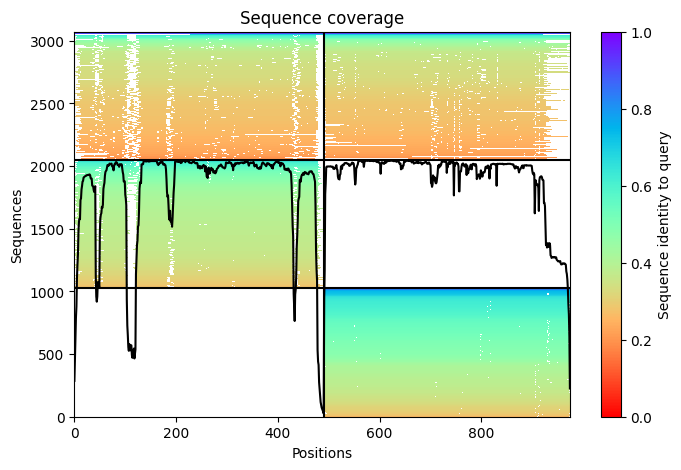

2025-06-02 12:56:41,894 Setting max_seq=508, max_extra_seq=2048
2025-06-02 13:01:20,217 alphafold2_multimer_v3_model_1_seed_000 recycle=0 pLDDT=86.8 pTM=0.521 ipTM=0.139
2025-06-02 13:04:52,823 alphafold2_multimer_v3_model_1_seed_000 recycle=1 pLDDT=87.4 pTM=0.52 ipTM=0.14 tol=2.73
2025-06-02 13:08:24,259 alphafold2_multimer_v3_model_1_seed_000 recycle=2 pLDDT=87.4 pTM=0.516 ipTM=0.14 tol=1.43
2025-06-02 13:11:55,914 alphafold2_multimer_v3_model_1_seed_000 recycle=3 pLDDT=87.6 pTM=0.516 ipTM=0.143 tol=0.708
2025-06-02 13:11:55,934 alphafold2_multimer_v3_model_1_seed_000 took 908.8s (3 recycles)


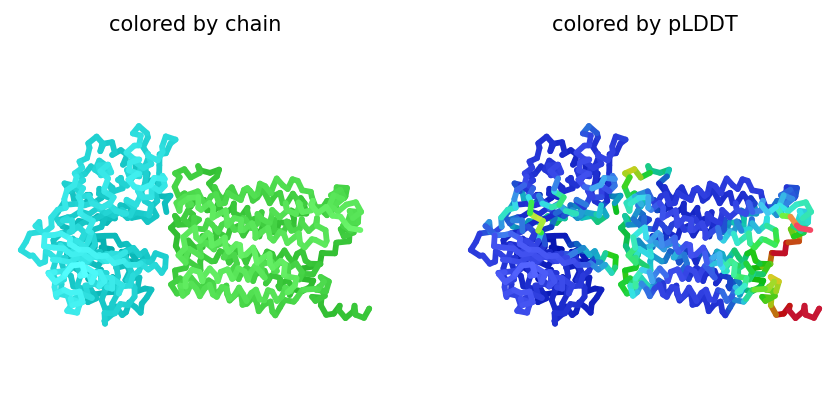

2025-06-02 13:15:29,347 alphafold2_multimer_v3_model_2_seed_000 recycle=0 pLDDT=87.3 pTM=0.514 ipTM=0.141
2025-06-02 13:19:00,979 alphafold2_multimer_v3_model_2_seed_000 recycle=1 pLDDT=87.1 pTM=0.51 ipTM=0.137 tol=5.36
2025-06-02 13:22:32,109 alphafold2_multimer_v3_model_2_seed_000 recycle=2 pLDDT=86.8 pTM=0.503 ipTM=0.137 tol=1.86
2025-06-02 13:26:04,809 alphafold2_multimer_v3_model_2_seed_000 recycle=3 pLDDT=87.1 pTM=0.504 ipTM=0.135 tol=1.57
2025-06-02 13:26:04,822 alphafold2_multimer_v3_model_2_seed_000 took 847.3s (3 recycles)


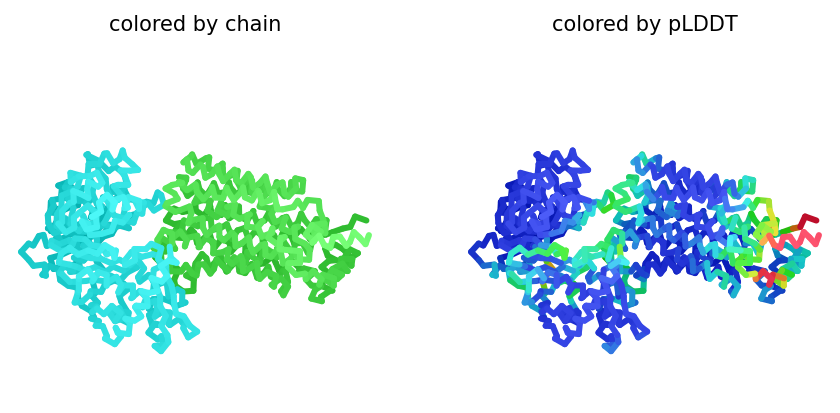

2025-06-02 13:29:36,832 alphafold2_multimer_v3_model_3_seed_000 recycle=0 pLDDT=87.8 pTM=0.523 ipTM=0.154
2025-06-02 13:33:08,517 alphafold2_multimer_v3_model_3_seed_000 recycle=1 pLDDT=88.1 pTM=0.529 ipTM=0.165 tol=4.4
2025-06-02 13:36:40,110 alphafold2_multimer_v3_model_3_seed_000 recycle=2 pLDDT=88.1 pTM=0.525 ipTM=0.159 tol=1.76
2025-06-02 13:40:13,206 alphafold2_multimer_v3_model_3_seed_000 recycle=3 pLDDT=88.2 pTM=0.526 ipTM=0.159 tol=0.774
2025-06-02 13:40:13,219 alphafold2_multimer_v3_model_3_seed_000 took 847.2s (3 recycles)


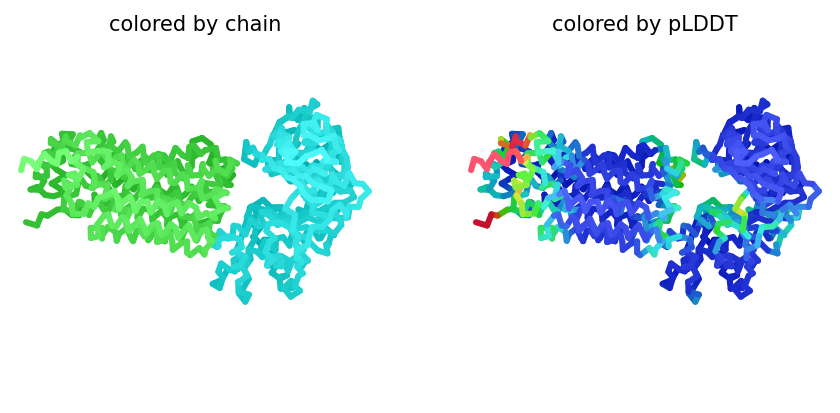

2025-06-02 13:43:45,106 alphafold2_multimer_v3_model_4_seed_000 recycle=0 pLDDT=88 pTM=0.529 ipTM=0.157
2025-06-02 13:47:16,555 alphafold2_multimer_v3_model_4_seed_000 recycle=1 pLDDT=88.9 pTM=0.535 ipTM=0.158 tol=5.41
2025-06-02 13:50:48,061 alphafold2_multimer_v3_model_4_seed_000 recycle=2 pLDDT=88.9 pTM=0.538 ipTM=0.161 tol=5.89
2025-06-02 13:54:20,445 alphafold2_multimer_v3_model_4_seed_000 recycle=3 pLDDT=88.7 pTM=0.536 ipTM=0.162 tol=2.38
2025-06-02 13:54:20,459 alphafold2_multimer_v3_model_4_seed_000 took 846.1s (3 recycles)


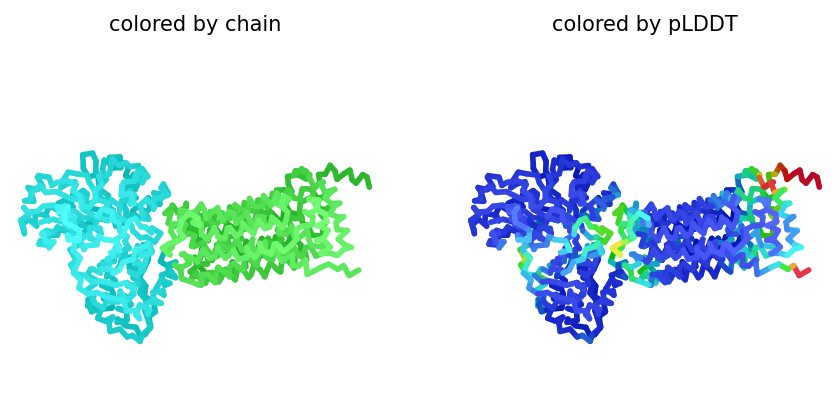

2025-06-02 13:57:51,404 alphafold2_multimer_v3_model_5_seed_000 recycle=0 pLDDT=87.8 pTM=0.535 ipTM=0.172
2025-06-02 14:01:23,317 alphafold2_multimer_v3_model_5_seed_000 recycle=1 pLDDT=87.9 pTM=0.535 ipTM=0.178 tol=1.67
2025-06-02 14:04:54,692 alphafold2_multimer_v3_model_5_seed_000 recycle=2 pLDDT=88 pTM=0.532 ipTM=0.167 tol=1.94
2025-06-02 14:08:26,820 alphafold2_multimer_v3_model_5_seed_000 recycle=3 pLDDT=88.2 pTM=0.533 ipTM=0.166 tol=1.22
2025-06-02 14:08:26,835 alphafold2_multimer_v3_model_5_seed_000 took 845.2s (3 recycles)


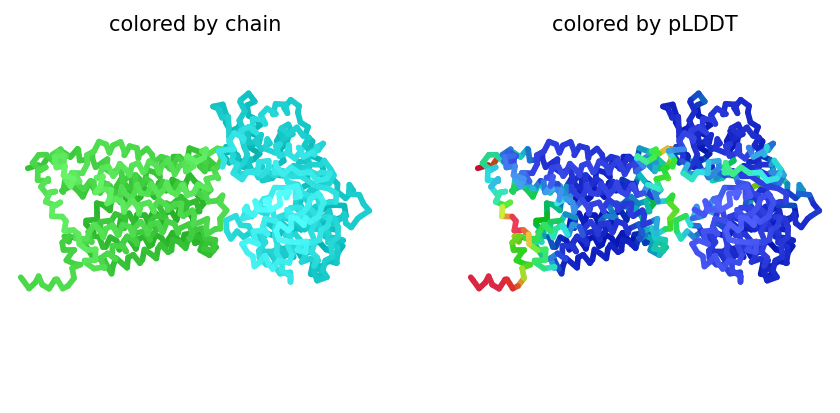

2025-06-02 14:08:27,984 reranking models by 'multimer' metric
2025-06-02 14:13:34,729 Relaxation took 306.7s
2025-06-02 14:13:34,735 rank_001_alphafold2_multimer_v3_model_5_seed_000 pLDDT=88.2 pTM=0.533 ipTM=0.166
2025-06-02 14:13:34,736 rank_002_alphafold2_multimer_v3_model_4_seed_000 pLDDT=88.7 pTM=0.536 ipTM=0.162
2025-06-02 14:13:34,736 rank_003_alphafold2_multimer_v3_model_3_seed_000 pLDDT=88.2 pTM=0.526 ipTM=0.159
2025-06-02 14:13:34,736 rank_004_alphafold2_multimer_v3_model_1_seed_000 pLDDT=87.6 pTM=0.516 ipTM=0.143
2025-06-02 14:13:34,737 rank_005_alphafold2_multimer_v3_model_2_seed_000 pLDDT=87.1 pTM=0.504 ipTM=0.135
2025-06-02 14:13:37,773 Done


FileNotFoundError: Cannot find file: locusIds_18059_17625_d3dcb.result.zip

In [8]:
#__________________________________________Alphafold2 code end__________________________________
#Run AlphaFold 2 multimer to get protein interaction prediction. Will download output zip file to your Google Drive.

%%time
for gene_pair in AF_inputs[3:6]:   #predicts protein interaction for the gene pairs of index 3 through 5
  runAF(gene_pair[0],gene_pair[1])


#If the for loop is really slow to download files and you want to run just one prediction instead, use:
#runAF(AF_inputs[7][0],AF_inputs[7][1])  to predict protein interaction for the gene pair which is index 7

# Instructions <a name="Instructions"></a>
For detailed instructions, tips and tricks, see recently published paper at [Nature Protocols](https://www.nature.com/articles/s41596-024-01060-5)

**Quick start**
1. Paste your protein sequence(s) in the input field.
2. Press "Runtime" -> "Run all".
3. The pipeline consists of 5 steps. The currently running step is indicated by a circle with a stop sign next to it.

**Result zip file contents**

1. PDB formatted structures sorted by avg. pLDDT and complexes are sorted by pTMscore. (unrelaxed and relaxed if `use_amber` is enabled).
2. Plots of the model quality.
3. Plots of the MSA coverage.
4. Parameter log file.
5. A3M formatted input MSA.
6. A `predicted_aligned_error_v1.json` using [AlphaFold-DB's format](https://alphafold.ebi.ac.uk/faq#faq-7) and a `scores.json` for each model which contains an array (list of lists) for PAE, a list with the average pLDDT and the pTMscore.
7. BibTeX file with citations for all used tools and databases.

At the end of the job a download modal box will pop up with a `jobname.result.zip` file. Additionally, if the `save_to_google_drive` option was selected, the `jobname.result.zip` will be uploaded to your Google Drive.

**MSA generation for complexes**

For the complex prediction we use unpaired and paired MSAs. Unpaired MSA is generated the same way as for the protein structures prediction by searching the UniRef100 and environmental sequences three iterations each.

The paired MSA is generated by searching the UniRef100 database and pairing the best hits sharing the same NCBI taxonomic identifier (=species or sub-species). We only pair sequences if all of the query sequences are present for the respective taxonomic identifier.

**Using a custom MSA as input**

To predict the structure with a custom MSA (A3M formatted): (1) Change the `msa_mode`: to "custom", (2) Wait for an upload box to appear at the end of the "MSA options ..." box. Upload your A3M. The first fasta entry of the A3M must be the query sequence without gaps.

It is also possilbe to provide custom MSAs for complex predictions. Read more about the format [here](https://github.com/sokrypton/ColabFold/issues/76).

As an alternative for MSA generation the [HHblits Toolkit server](https://toolkit.tuebingen.mpg.de/tools/hhblits) can be used. After submitting your query, click "Query Template MSA" -> "Download Full A3M". Download the A3M file and upload it in this notebook.

**PDB100** <a name="pdb100"></a>

As of 23/06/08, we have transitioned from using the PDB70 to a 100% clustered PDB, the PDB100. The construction methodology of PDB100 differs from that of PDB70.

The PDB70 was constructed by running each PDB70 representative sequence through [HHblits](https://github.com/soedinglab/hh-suite) against the [Uniclust30](https://uniclust.mmseqs.com/). On the other hand, the PDB100 is built by searching each PDB100 representative structure with [Foldseek](https://github.com/steineggerlab/foldseek) against the [AlphaFold Database](https://alphafold.ebi.ac.uk).

To maintain compatibility with older Notebook versions and local installations, the generated files and API responses will continue to be named "PDB70", even though we're now using the PDB100.

**Using custom templates** <a name="custom_templates"></a>

To predict the structure with a custom template (PDB or mmCIF formatted): (1) change the `template_mode` to "custom" in the execute cell and (2) wait for an upload box to appear at the end of the "Input Protein" box. Select and upload your templates (multiple choices are possible).

* Templates must follow the four letter PDB naming with lower case letters.

* Templates in mmCIF format must contain `_entity_poly_seq`. An error is thrown if this field is not present. The field `_pdbx_audit_revision_history.revision_date` is automatically generated if it is not present.

* Templates in PDB format are automatically converted to the mmCIF format. `_entity_poly_seq` and `_pdbx_audit_revision_history.revision_date` are automatically generated.

If you encounter problems, please report them to this [issue](https://github.com/sokrypton/ColabFold/issues/177).

**Comparison to the full AlphaFold2 and AlphaFold2 Colab**

This notebook replaces the homology detection and MSA pairing of AlphaFold2 with MMseqs2. For a comparison against the [AlphaFold2 Colab](https://colab.research.google.com/github/deepmind/alphafold/blob/main/notebooks/AlphaFold.ipynb) and the full [AlphaFold2](https://github.com/deepmind/alphafold) system read our [paper](https://www.nature.com/articles/s41592-022-01488-1).

**Troubleshooting**
* Check that the runtime type is set to GPU at "Runtime" -> "Change runtime type".
* Try to restart the session "Runtime" -> "Factory reset runtime".
* Check your input sequence.

**Known issues**
* Google Colab assigns different types of GPUs with varying amount of memory. Some might not have enough memory to predict the structure for a long sequence.
* Your browser can block the pop-up for downloading the result file. You can choose the `save_to_google_drive` option to upload to Google Drive instead or manually download the result file: Click on the little folder icon to the left, navigate to file: `jobname.result.zip`, right-click and select \"Download\" (see [screenshot](https://pbs.twimg.com/media/E6wRW2lWUAEOuoe?format=jpg&name=small)).

**Limitations**
* Computing resources: Our MMseqs2 API can handle ~20-50k requests per day.
* MSAs: MMseqs2 is very precise and sensitive but might find less hits compared to HHblits/HMMer searched against BFD or MGnify.
* We recommend to additionally use the full [AlphaFold2 pipeline](https://github.com/deepmind/alphafold).

**Description of the plots**
*   **Number of sequences per position** - We want to see at least 30 sequences per position, for best performance, ideally 100 sequences.
*   **Predicted lDDT per position** - model confidence (out of 100) at each position. The higher the better.
*   **Predicted Alignment Error** - For homooligomers, this could be a useful metric to assess how confident the model is about the interface. The lower the better.

**Bugs**
- If you encounter any bugs, please report the issue to https://github.com/sokrypton/ColabFold/issues

**License**

The source code of ColabFold is licensed under [MIT](https://raw.githubusercontent.com/sokrypton/ColabFold/main/LICENSE). Additionally, this notebook uses the AlphaFold2 source code and its parameters licensed under [Apache 2.0](https://raw.githubusercontent.com/deepmind/alphafold/main/LICENSE) and [CC BY 4.0](https://creativecommons.org/licenses/by-sa/4.0/) respectively. Read more about the AlphaFold license [here](https://github.com/deepmind/alphafold).

**Acknowledgments**
- We thank the AlphaFold team for developing an excellent model and open sourcing the software.

- [KOBIC](https://kobic.re.kr) and [Söding Lab](https://www.mpinat.mpg.de/soeding) for providing the computational resources for the MMseqs2 MSA server.

- Richard Evans for helping to benchmark the ColabFold's Alphafold-multimer support.

- [David Koes](https://github.com/dkoes) for his awesome [py3Dmol](https://3dmol.csb.pitt.edu/) plugin, without whom these notebooks would be quite boring!

- Do-Yoon Kim for creating the ColabFold logo.

- A colab by Sergey Ovchinnikov ([@sokrypton](https://twitter.com/sokrypton)), Milot Mirdita ([@milot_mirdita](https://twitter.com/milot_mirdita)) and Martin Steinegger ([@thesteinegger](https://twitter.com/thesteinegger)).
